In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [18]:
file_path = '../../data/dataV.csv'
df = pd.read_csv(file_path, parse_dates=['Date'])

df.head()

,Date,Inflation,CPI,Treasury_Yield,Open,High,Low,Close,SP500_Adj_Close,Volume,...,returns,EWMA_VM,GARCH_VM,EGARCH_VM,RogersSatchell_VM,garman_klass,parkinson,yang_zhang,BS_30d_ATM_Call,move
0,2003-01-03,0.5302,0.0,0.7447,0.0477,0.0447,0.0492,0.0482,0.0482,0.0698,...,0.5843,0.1470,0.0472,0.6970,0.0858,0.0718,0.0703,0.0546,0.0288,1
1,2003-01-06,0.5336,0.0,0.7532,0.0476,0.0490,0.0503,0.0525,0.0525,0.0973,...,0.6219,0.1413,0.0377,0.5021,0.1080,0.1360,0.2206,0.1746,0.1102,0
2,2003-01-07,0.5302,0.0,0.7426,0.0518,0.0488,0.0527,0.0512,0.0512,0.1071,...,0.5742,0.1395,0.0319,0.3563,0.0869,0.0833,0.0957,0.0749,0.0434,0
3,2003-01-08,0.5604,0.0,0.7342,0.0505,0.0472,0.0503,0.0485,0.0485,0.1001,...,0.5617,0.1343,0.0256,0.2846,0.0664,0.0806,0.1348,0.1061,0.0633,1
4,2003-01-09,0.5839,0.0,0.7743,0.0478,0.0483,0.0506,0.0522,0.0522,0.1085,...,0.6169,0.1306,0.0212,0.2518,0.0499,0.0878,0.1723,0.1360,0.0849,0


In [19]:
df.describe()


,Date,Inflation,CPI,Treasury_Yield,Open,High,Low,Close,SP500_Adj_Close,Volume,...,returns,EWMA_VM,GARCH_VM,EGARCH_VM,RogersSatchell_VM,garman_klass,parkinson,yang_zhang,BS_30d_ATM_Call,move
count,5369,5369.000000,5369.000000,5369.000000,5369.000000,5369.000000,5369.000000,5369.000000,5369.000000,5369.000000,...,5369.00000,5369.000000,5369.000000,5369.000000,5369.000000,5369.000000,5369.000000,5369.000000,5369.000000,5369.000000
mean,2013-09-30 01:09:11.834606080,0.687348,0.403208,0.521834,0.305690,0.304388,0.306655,0.307003,0.307003,0.295592,...,0.58663,0.110699,0.014663,0.001245,0.083451,0.080260,0.100180,0.081080,0.119243,0.544980
min,2003-01-03 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008-05-16 00:00:00,0.600700,0.229800,0.324900,0.115200,0.113400,0.116500,0.116000,0.116000,0.231000,...,0.57110,0.032200,0.001500,0.000000,0.043200,0.038700,0.046100,0.037100,0.044900,0.000000
50%,2013-09-30 00:00:00,0.721500,0.389100,0.497900,0.211300,0.209200,0.213600,0.212400,0.212400,0.294700,...,0.58730,0.062800,0.003700,0.000000,0.066300,0.062300,0.076800,0.061800,0.078100,1.000000
75%,2019-02-14 00:00:00,0.778500,0.540100,0.736300,0.443300,0.442700,0.444200,0.445200,0.445200,0.353400,...,0.60340,0.153900,0.012400,0.000000,0.101200,0.098700,0.123700,0.100000,0.147700,1.000000
max,2024-06-28 00:00:00,1.000000,0.997600,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,0.697000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,NaN,0.135878,0.251601,0.238928,0.242488,0.243291,0.242035,0.243057,0.243057,0.122345,...,0.04774,0.120764,0.039962,0.016739,0.069745,0.070357,0.088994,0.073533,0.118161,0.498019


In [20]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                5369 non-null   datetime64[ns]
 1   Inflation           5369 non-null   float64       
 2   CPI                 5369 non-null   float64       
 3   Treasury_Yield      5369 non-null   float64       
 4   Open                5369 non-null   float64       
 5   High                5369 non-null   float64       
 6   Low                 5369 non-null   float64       
 7   Close               5369 non-null   float64       
 8   SP500_Adj_Close     5369 non-null   float64       
 9   Volume              5369 non-null   float64       
 10  GDP                 5369 non-null   float64       
 11  mortage             5369 non-null   float64       
 12  unemployement       5369 non-null   float64       
 13  fed_fund_rate       5369 non-null   float64     

                                Date   volatility
count                           5369  5369.000000
mean   2013-09-30 01:09:11.834606080     0.095812
min              2003-01-03 00:00:00     0.000000
25%              2008-05-16 00:00:00     0.043800
50%              2013-09-30 00:00:00     0.073100
75%              2019-02-14 00:00:00     0.117900
max              2024-06-28 00:00:00     1.000000
std                              NaN     0.086633


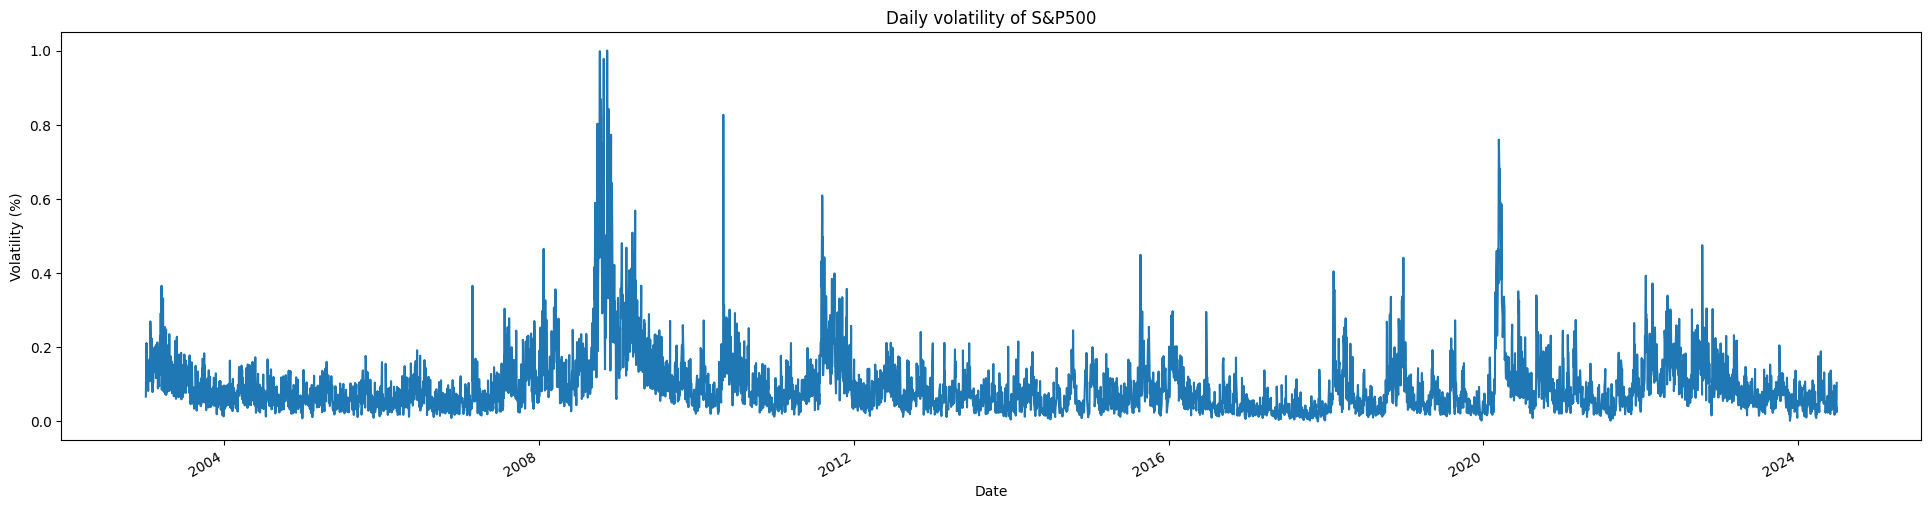

In [21]:
print(df[['Date', 'volatility']].describe())

df.set_index('Date')['volatility'].plot(figsize=(24, 6))
plt.title("Daily volatility of S&P500")
plt.xlabel("Date")
plt.ylabel("Volatility (%)")
plt.show()

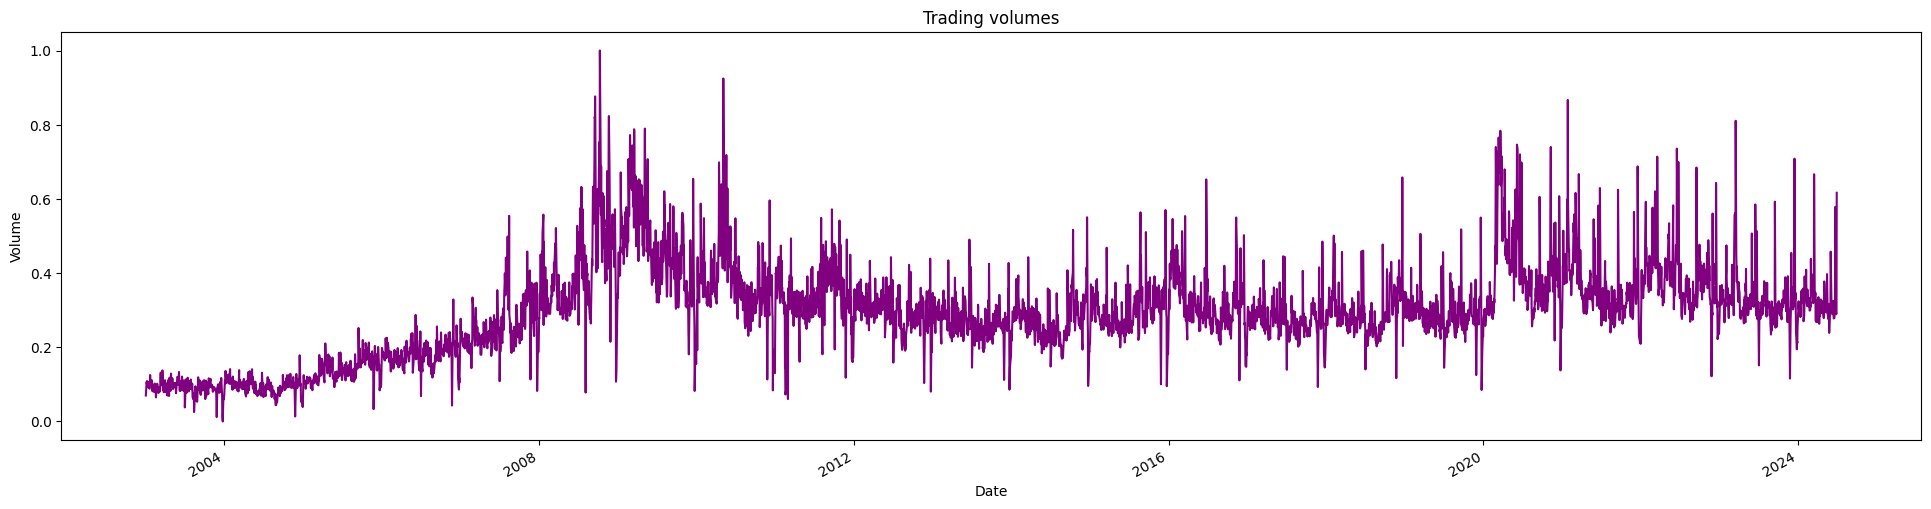

In [22]:
df.set_index('Date')['Volume'].plot(figsize=(24, 6), color='purple')
plt.title("Trading volumes")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()


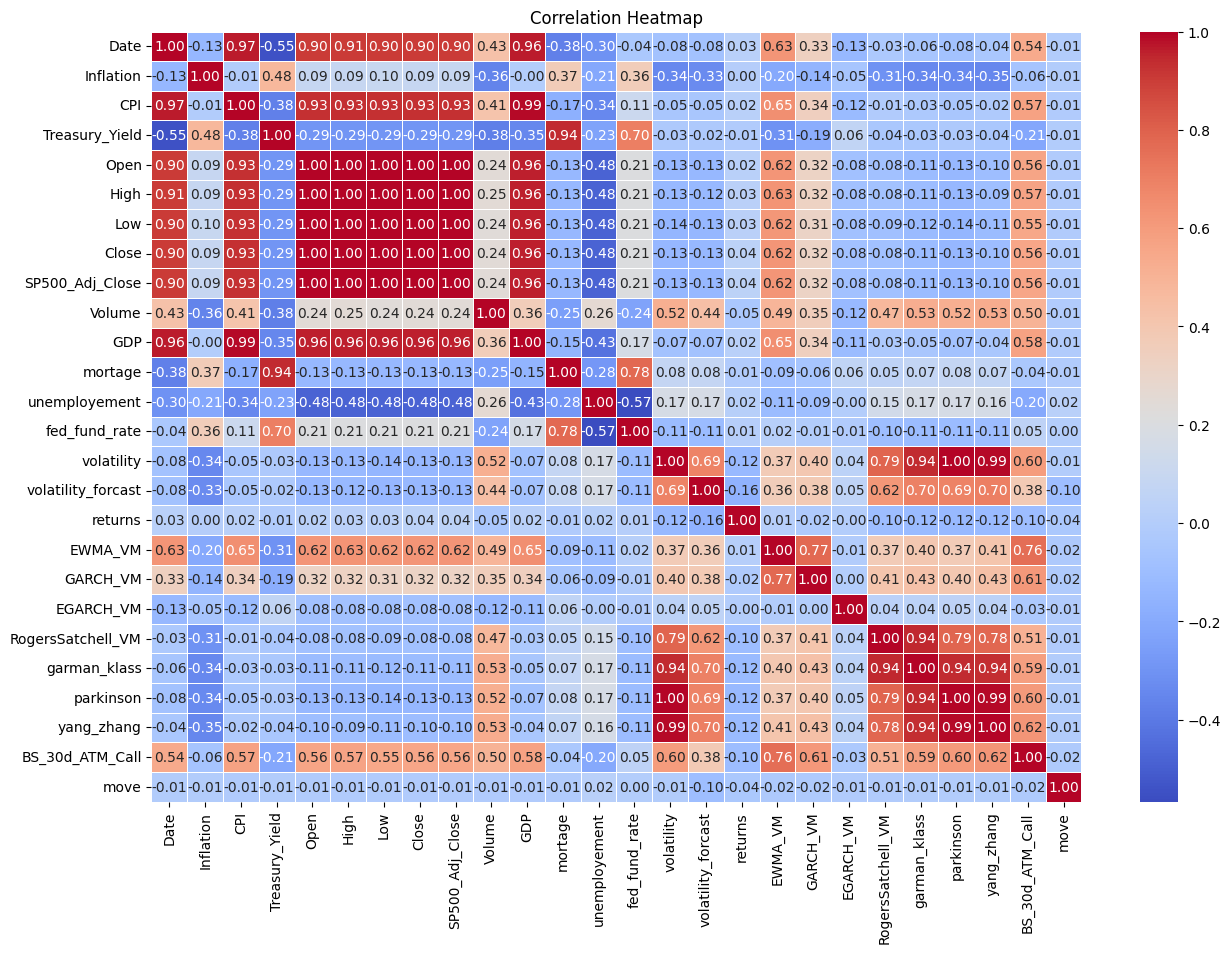

In [23]:
correlation_matrix = df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap")

plt.show()

C:\Users\paula\AppData\Local\Temp\ipykernel_9044\2922925087.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['volatility_forcast'], shade=True)


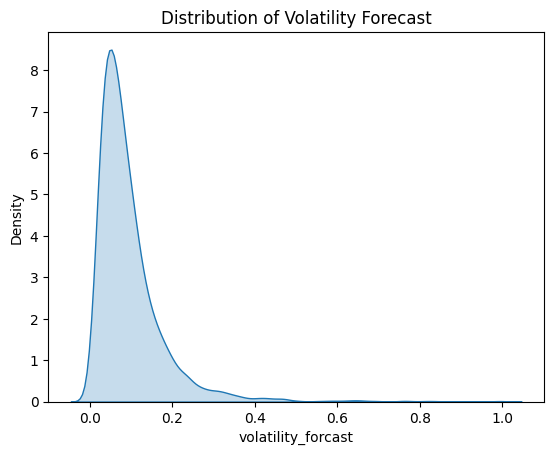

In [24]:
sns.kdeplot(df['volatility_forcast'], shade=True)
plt.title('Distribution of Volatility Forecast')
plt.show()


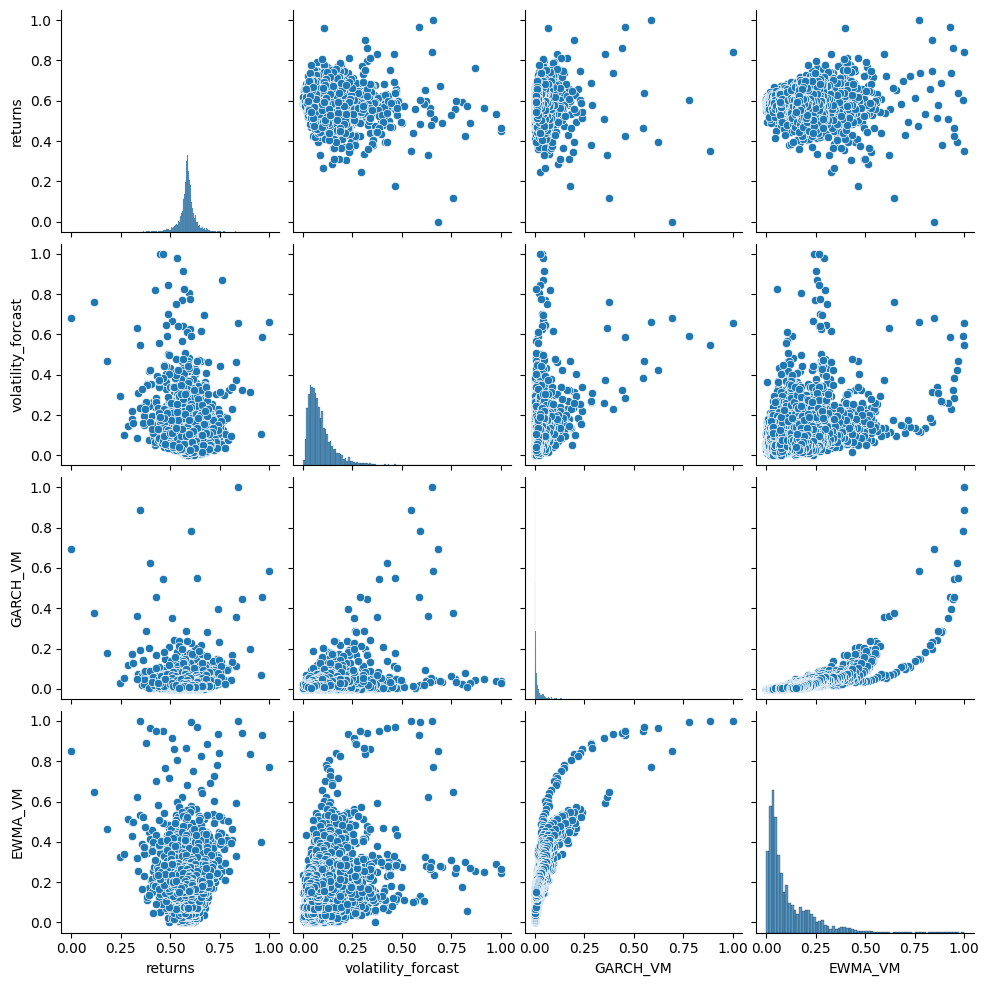

In [25]:
sns.pairplot(df[['returns', 'volatility_forcast', 'GARCH_VM', 'EWMA_VM']])
plt.show()


In [26]:
from sklearn.preprocessing import StandardScaler

# Extract features and target
X = df.drop(['Date', 'volatility_forcast'], axis=1)
y = df['volatility_forcast']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


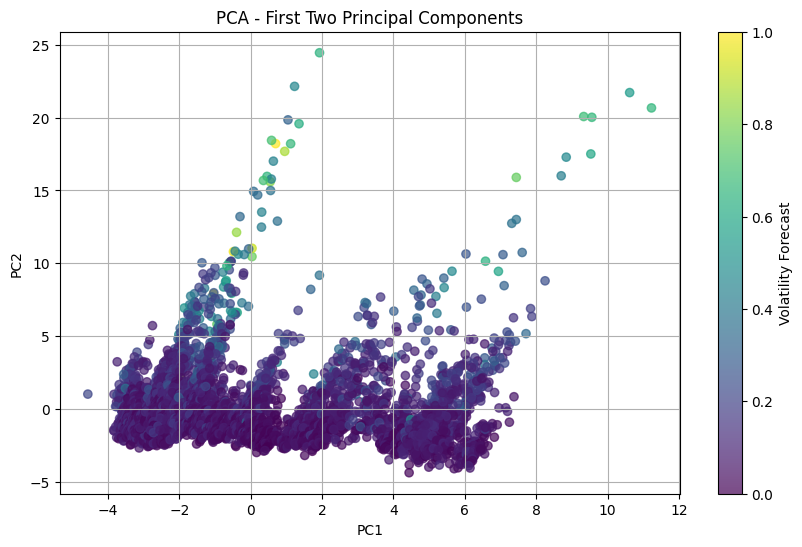

  Principal Component  Explained Variance Ratio
0                 PC1                  0.350651
1                 PC2                  0.253710


In [27]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.colorbar(label='Volatility Forecast')
plt.title('PCA - First Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()

# Explain variance ratio
explained_variance = pd.DataFrame(
    {'Principal Component': [f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))],
     'Explained Variance Ratio': pca.explained_variance_ratio_}
)
print(explained_variance)


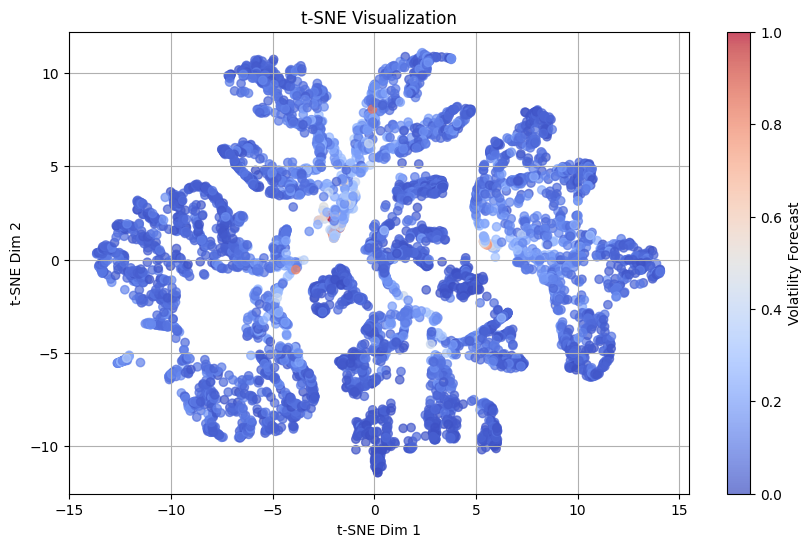

In [28]:
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
X_tsne = tsne.fit_transform(X_scaled)

# Visualize t-SNE results
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='coolwarm', alpha=0.7)
plt.colorbar(label='Volatility Forecast')
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Dim 1')
plt.ylabel('t-SNE Dim 2')
plt.grid()
plt.show()


c:\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


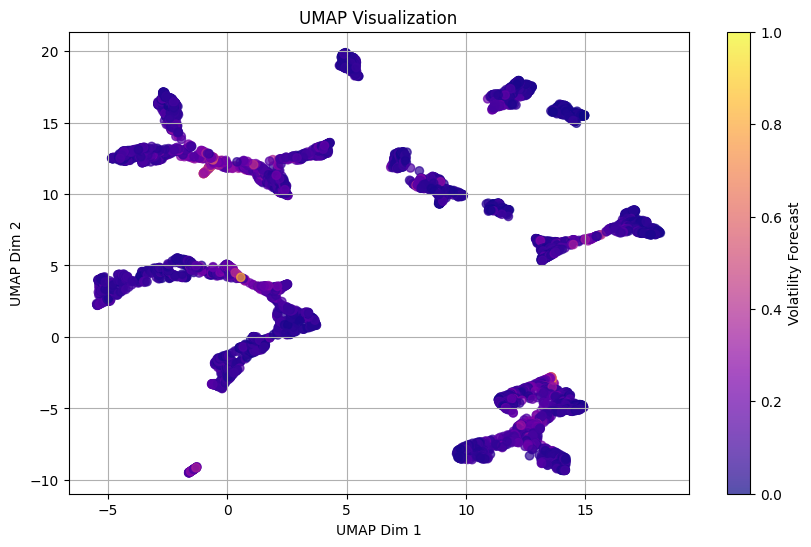

In [29]:
import umap

# Apply UMAP
umap_reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
X_umap = umap_reducer.fit_transform(X_scaled)

# Visualize UMAP results
plt.figure(figsize=(10, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='plasma', alpha=0.7)
plt.colorbar(label='Volatility Forecast')
plt.title('UMAP Visualization')
plt.xlabel('UMAP Dim 1')
plt.ylabel('UMAP Dim 2')
plt.grid()
plt.show()


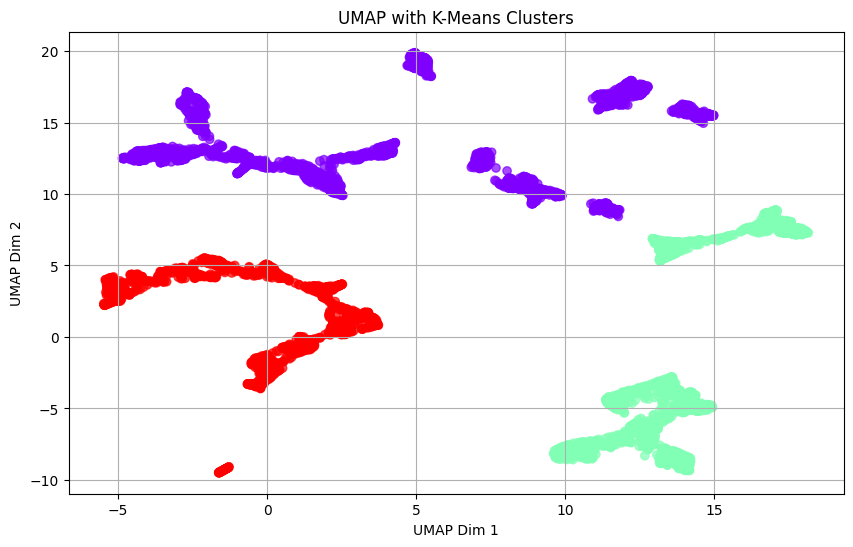

In [30]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_umap)

plt.figure(figsize=(10, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=clusters, cmap='rainbow', alpha=0.7)
plt.title('UMAP with K-Means Clusters')
plt.xlabel('UMAP Dim 1')
plt.ylabel('UMAP Dim 2')
plt.grid()
plt.show()


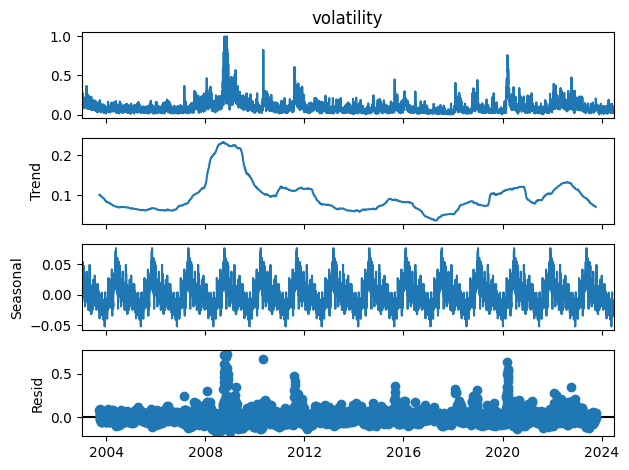

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df.set_index('Date')['volatility'], model='additive', period=365)
decomposition.plot()
plt.show()


In [32]:
# TO BE CONTINUE